Завдання
---
* Зробити гістаграму даних
* Зробити box plot (ящик з вусами) для кожного місяця
* Агрегувати дані по місяцям із функцією mean
* Розкласти часовий ряд на компоненти: тренд, сезонність та залишки
* Порахувати ковзане середнє (спробуйте різні розміри вікна)

In [1]:
import pandas as pd
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

data  = pd.read_csv('data/DAYTON_hourly.csv.zip')
data.head()

Datetime  DAYTON_MW
0  2004-12-31 01:00:00     1596.0
1  2004-12-31 02:00:00     1517.0
2  2004-12-31 03:00:00     1486.0
3  2004-12-31 04:00:00     1469.0
4  2004-12-31 05:00:00     1472.0

In [2]:
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)
data['year'] = data.index.year
data['month'] = data.index.month
data.head()

DAYTON_MW  year  month
Datetime                                   
2004-12-31 01:00:00     1596.0  2004     12
2004-12-31 02:00:00     1517.0  2004     12
2004-12-31 03:00:00     1486.0  2004     12
2004-12-31 04:00:00     1469.0  2004     12
2004-12-31 05:00:00     1472.0  2004     12

<Axes: xlabel='Datetime'>

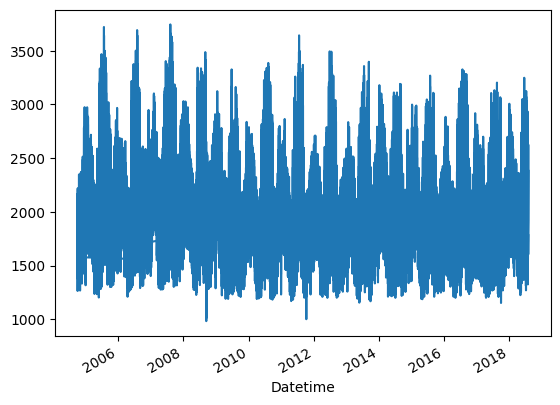

In [3]:
data['DAYTON_MW'].plot()

In [4]:
import plotly.express as px
px.histogram(data, x='DAYTON_MW')

In [5]:
px.box(data, x = 'month', y = 'DAYTON_MW')

<Axes: xlabel='Datetime'>

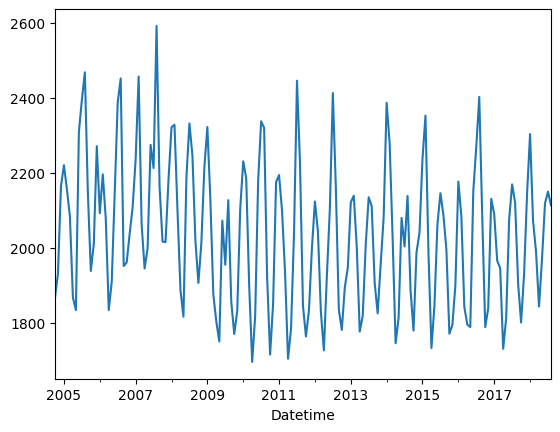

In [6]:
aggregated_data = data.groupby(pd.Grouper(freq='MS'))['DAYTON_MW'].mean()
aggregated_data.plot()

<Axes: xlabel='Datetime'>

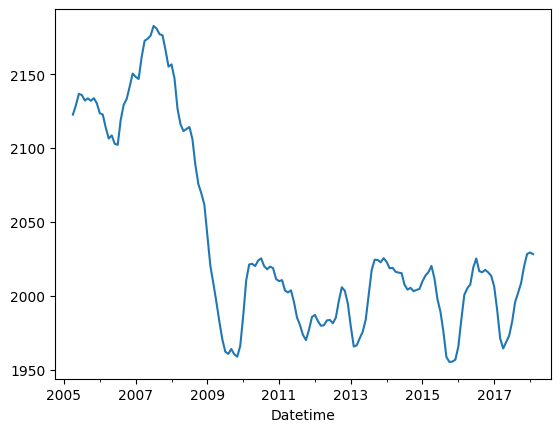

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_result = seasonal_decompose(aggregated_data, period=12)

decomposition_trend = decomposition_result.trend
decomposition_seasonal = decomposition_result.seasonal
decomposition_residuals = decomposition_result.resid

decomposition_trend.plot()

<Axes: xlabel='Datetime'>

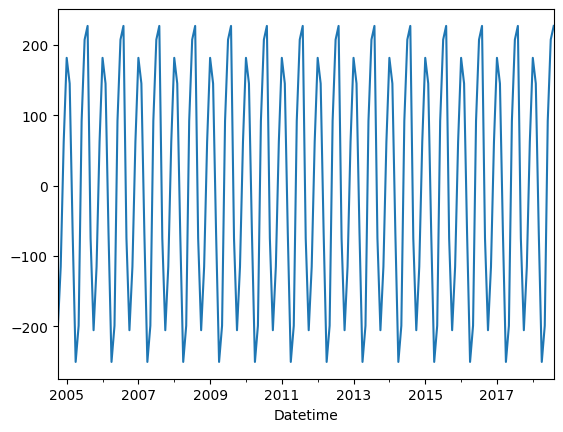

In [8]:
decomposition_seasonal.plot()

<Axes: xlabel='Datetime'>

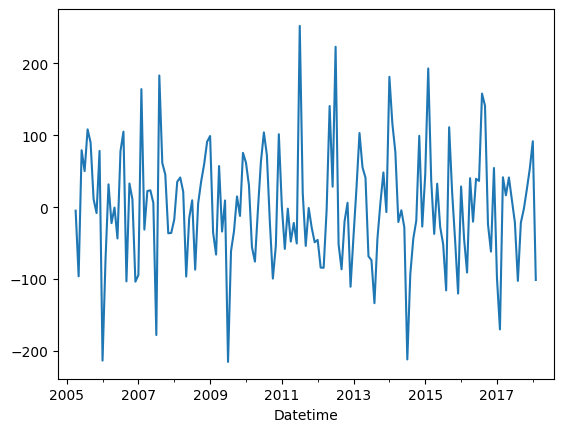

In [9]:
decomposition_residuals.plot()

In [10]:
from plotly.graph_objects import Scatter, Figure

trace1 = Scatter(x = aggregated_data.index, y = aggregated_data.values, name = 'Original')
trace2 = Scatter(x = aggregated_data.index, y = decomposition_trend.values, name = 'Trend')
fig    = Figure(data = [trace1,trace2])

fig.show()

In [11]:
aggregated_data_with_moving_averages = aggregated_data.copy()

for i in range(1, 10): 
    aggregated_data_with_moving_averages = pd.concat(
        [aggregated_data_with_moving_averages, aggregated_data.rolling(i).mean()], axis=1
    )
    aggregated_data_with_moving_averages.columns = list(aggregated_data_with_moving_averages.columns[:-1]) + [f'Rolling_mean_{i}']

aggregated_data_with_moving_averages


DAYTON_MW  Rolling_mean_1  Rolling_mean_2  Rolling_mean_3  Rolling_mean_4  Rolling_mean_5  Rolling_mean_6  Rolling_mean_7  Rolling_mean_8  Rolling_mean_9
Datetime                                                                                                                                                               
2004-10-01  1866.481132     1866.481132             NaN             NaN             NaN             NaN             NaN             NaN             NaN             NaN
2004-11-01  1930.211111     1930.211111     1898.346122             NaN             NaN             NaN             NaN             NaN             NaN             NaN
2004-12-01  2163.391129     2163.391129     2046.801120     1986.694457             NaN             NaN             NaN             NaN             NaN             NaN
2005-01-01  2219.696237     2219.696237     2191.543683     2104.432826     2044.944902             NaN             NaN             NaN             NaN             NaN
2005-02-01  2155.599702     2155.599702     2187.647969     2179.562356     2117.224545     2067.075862             NaN             NaN             NaN             NaN
...                 ...             ...             ...             ...             ...             ...             ...             ...             ...             ...
2018-04-01  1843.079167     1843.079167     1916.053715     1968.038786     2051.683996     2070.156874     2046.665865     2011.512753     1998.255083     2011.800814
2018-05-01  1969.060484     1969.060484     1906.069825     1933.722638     1968.294211     2035.159293     2053.307476     2035.579382     2006.206220     1995.011239
2018-06-01  2117.933333     2117.933333     2043.496909     1976.690995     1979.775312     1998.222035     2048.954967     2062.539741     2045.873626     2018.620343
2018-07-01  2149.510753     2149.510753     2133.722043     2078.834857     2019.895934     2013.722400     2023.436821     2063.320079     2073.411117     2057.388862
2018-08-01  2112.775510     2112.775510     2131.143131     2126.739865     2087.320020     2038.471849     2030.231252     2036.199491     2069.502008     2077.784939

[167 rows x 10 columns]

In [12]:
px.line(aggregated_data_with_moving_averages, y = aggregated_data_with_moving_averages.columns)